### import libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#library for t test
from scipy.stats import ttest_ind

### Read data

In [2]:
data=pd.read_csv('dataset w7.csv')
data.head()

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21


### 1. Carry out descriptive analytics on the dataset.

In [3]:
data['Gender'].value_counts()

female    16
male      12
Name: Gender, dtype: int64

In [4]:
data['Test preparation'].value_counts()

none         21
completed     7
Name: Test preparation, dtype: int64

In [5]:
data.describe()

,Total Marks
count,28.000000
mean,32.321429
std,12.454520
min,12.000000
25%,22.500000
50%,33.000000
75%,43.250000
max,50.000000


In [6]:
data['Total Marks'].median()

33.0

In [7]:
data['Total Marks'].mode()

0    14
1    18
2    27
3    28
4    41
5    43
6    44
7    48
Name: Total Marks, dtype: int64

In [8]:
df=data[['Gender','Total Marks']].groupby('Gender').describe()
df

Total Marks                                                      
             count       mean        std   min    25%   50%    75%   max
Gender                                                                  
female        16.0  33.750000  12.865976  12.0  25.50  39.0  43.50  50.0
male          12.0  30.416667  12.168950  14.0  21.75  29.0  43.25  47.0

Text(0, 0.5, 'Mean Mark')

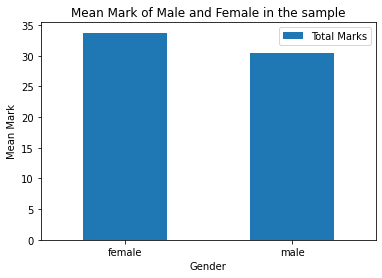

In [9]:
df1=data[['Gender','Total Marks']].groupby('Gender').mean()
df1.plot(kind='bar')
plt.title('Mean Mark of Male and Female in the sample')
plt.xticks(rotation=0)
plt.xlabel('Gender')
plt.ylabel('Mean Mark')

In [10]:
df2a=data[['Test preparation','Total Marks']].groupby('Test preparation').describe()
df2a

Total Marks                                                \
                       count       mean        std   min   25%   50%   75%   
Test preparation                                                             
completed                7.0  44.571429   3.359422  40.0  43.0  44.0  46.0   
none                    21.0  28.238095  11.661495  12.0  18.0  27.0  38.0   

                        
                   max  
Test preparation        
completed         50.0  
none              48.0

Text(0, 0.5, 'Mean Mark')

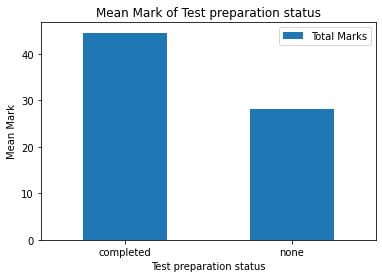

In [11]:
df2=data[['Test preparation','Total Marks']].groupby('Test preparation').mean()
df2.plot(kind='bar')
plt.title('Mean Mark of Test preparation status')
plt.xticks(rotation=0)
plt.xlabel('Test preparation status')
plt.ylabel('Mean Mark')

### 2. Check whether female and male students scored the same marks.


Here the sample size is less than 30 and population standard deviation is unknown, so we go for the T Test with level of significance 5% (alpha=0.05)

In [12]:
#H0: Both male and Female students scored different Marks
#H1: Male and female students scored the same marks


In [13]:
Female=data[data['Gender'] == 'female']['Total Marks']
Male=data[data['Gender'] =='male']['Total Marks']

In [14]:
alpha=0.05

In [15]:
_,P = ttest_ind(Female,Male)
print("P Value : ",P)

P Value :  0.4937822317960763


In [16]:
if P>alpha:
    print("Failing to Reject H0")
else:
    print("rejecting the H0")

Failing to Reject H0


Here p value > alpha, therefore, we accept the Null hypothesis

we conclude that male and female students scored different marks

### 3. Check whether test preparation helps the students

In [17]:
#H0: Test preparation doesnt make any significant change in the marks of the students
#H1: Test preparation helps make significant change in the marks of the students

In [18]:
none=data[data['Test preparation']=='none']['Total Marks']
completed=data[data['Test preparation']=='completed']['Total Marks']

In [19]:
alpha=0.05

In [20]:
_,P = ttest_ind(none,completed)
print("P Value : ",P)

P Value :  0.0012671292457320106


In [21]:
if P>alpha:
    print("Failing to Reject H0")
else:
    print("rejecting the H0")

rejecting the H0


Here alpha > P Value, therefore we reject null hypothesis and accept the alternative hypothesis.

we conclude that Test preparation helps make significant change in the marks of the students
